<a href="https://colab.research.google.com/github/pragnavi/Machine-Learning/blob/master/PR2370_MLFall_22_GBoost_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
numsamples, numfeatures = iris.data.shape
print(f'samples {numsamples}')
print(numfeatures)
print(list(iris.target_names))

samples 150
4
['setosa', 'versicolor', 'virginica']


Scikit learn datasets are stored as ***numpy arrays***.
We use *pandas dataframes*  for data analysis and visualization.
The scikit-learn dataset is split into predictor and target columns. We bring them together with the numpy concatenation function `(np.c_)` before conversion.

In [ ]:
type(iris)

sklearn.utils.Bunch

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

# Plot the data

Text(0, 0.5, 'Sepal width')

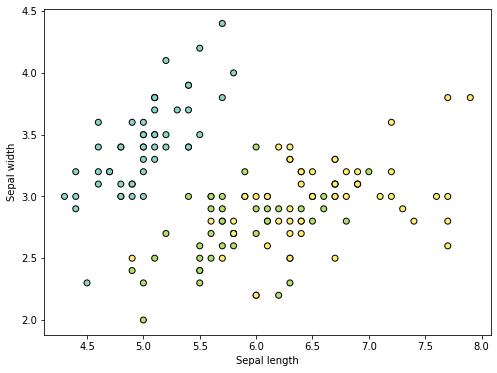

In [ ]:
import matplotlib.pyplot as plt

X = iris.data
y = iris.target


plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
# we are only using the sepal length/width
ax = plt.subplot(111)
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set3, edgecolor='k')
#ax.legend()
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')



The target column, according to the scikit-learn documentation, https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html, consists of three different iris flowers:  **setosa**, **versicolor**, and **virginica**. There are 150 rows with 50 samples of each.

As we have discussed in class we need to split the data into train and test.

# XGBOOST Classification

### 1. Convert to suitable format

In [ ]:
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


### 2. Split into train and Test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], random_state=2)

### 3. Create and fit an XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

## Here we initialize XGBoost with "hyperparameters"
## for our purposed just stick with the default ones.
## If you want to play around with others you can read
## more about it in https://xgboost.readthedocs.io/en/latest/parameter.html

# xgb = XGBClassifier(booster='gbtree', objective='multi:softprob',
#                     max_depth=6, learning_rate=0.1, n_estimators=10,
#                     random_state=2, n_jobs=-1)

xgb = XGBClassifier( max_depth=6, n_estimators=5,
                    random_state=2)

In [ ]:
## now we will 'fit' the classifier to the data

model = xgb.fit(X_train, y_train)

### 4. Predict values on the test set

In [ ]:
## now we will predict values
# TODO
ypred = model.predict(X_test)

### 5. Measure *accuracy*

In [ ]:
## check our score
# TODO
score = accuracy_score(y_test,ypred)
print(score)

0.9736842105263158


Which features are important?

In [ ]:
print(model.feature_importances_)
print(iris['feature_names'])

[0.         0.         0.24403754 0.7559625 ]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


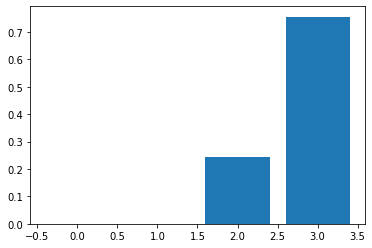

In [ ]:
# plot
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

# XGBoost REgression


In [ ]:
# load the boston housing dataset

from sklearn.datasets import load_boston
boston = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


In [ ]:
# as you can see we have 506 rows with 13 columns
print(boston.data.shape)
print(boston.target.dtype)

(506, 13)
float64


In [ ]:
# These are our features

print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [ ]:
# Full Description
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### 1. Convert to suitable format

In [ ]:
df = pd.DataFrame(data=np.c_[boston['data'], boston['target']], columns= np.append(boston['feature_names'],['target']))

### 2.  Split into train and test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(boston['data'], boston['target'], random_state=2)

### 3. Create an XGBoot Regressor

In [ ]:
from xgboost import XGBRegressor

xg_reg = XGBRegressor(max_depth=5, n_estimators=10)

In [ ]:
model = xg_reg.fit(X_train, y_train)

[00:28:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


### 4. Predict values on the test set




In [ ]:
# TODO
y_pred = model.predict(X_test)

### 5.  Measure accuracy



In [ ]:
## we will use the mean squared error
import sklearn.metrics as skmetrics

rmse = np.sqrt(skmetrics.mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")



RMSE: 9.60383024971372
